In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D, Dense, Input
from sklearn.preprocessing import LabelEncoder
num_img = 32

In [2]:
prod_df = pd.read_csv('C:/Users/IDU/OneDrive - GTÜ/Desktop/TEZ/MODANISA/prod_details.csv', low_memory=False)

prod_df = prod_df[['productid', 'category']]

df = prod_df.loc[ prod_df['category'].isin(['Tesettür Elbise','Takım','Tunik'])]

df = df[:3000]
num_classes = 3

df = df.astype('str')

In [3]:
df.head()

,productid,category
3,1168509,Tunik
5,7981329,Takım
20,7978162,Tesettür Elbise
44,1792618,Tesettür Elbise
64,1371598,Tunik


In [4]:
path = "C:/Users/IDU/OneDrive - GTÜ/Desktop/TEZ/poses/NPdata/"
dirlist = os.listdir(path)

prod_cat = []
posedf = pd.DataFrame(columns=["productid","category"])
for i, each in enumerate(dirlist):
    if len(prod_cat)==num_classes :
        break
    elif (each.split("."))[0] in df.values:
        print(each)
        id =str((each.split("."))[0])
        prod = (df[df['productid'] == id].values)[0][0]
        cat =(df[df['productid'] == id].values)[0][1] 
        prod_cat.append([prod, cat])
        

1002422.npy
1006099.npy
1006101.npy
1006102.npy
1014924.npy
1025485.npy
1025486.npy
1025570.npy
1025660.npy
1025682.npy


In [5]:
prod_cat

[['1002422', 'Tunik'],
 ['1006099', 'Tunik'],
 ['1006101', 'Tunik'],
 ['1006102', 'Tunik'],
 ['1014924', 'Tesettür Elbise'],
 ['1025485', 'Tesettür Elbise'],
 ['1025486', 'Tesettür Elbise'],
 ['1025570', 'Tesettür Elbise'],
 ['1025660', 'Tunik'],
 ['1025682', 'Tunik']]

In [6]:
image = Image.open("C:/Users/IDU/Desktop/dataset/"+ prod_cat[0][0]+ ".jpg")
image_array = np.array(image)

In [7]:
image.size

(800, 1080)

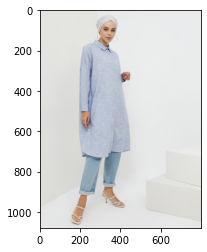

In [8]:
plt.imshow(image)
plt.show()

In [9]:
image_array.shape

(1080, 800, 3)

In [10]:
img_resized = image.resize((100,135))

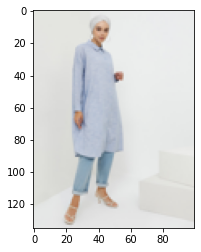

In [11]:
plt.imshow(img_resized)
plt.show()

In [12]:
input_images = []
input_poses = []
labels =[]
for each in prod_cat:
    image = Image.open("C:/Users/IDU/Desktop/dataset/"+each[0] + ".jpg")
    image_array = np.array(image.resize((100,135)))
    labels.append(each[1])
    input_images.append(image_array)
    pose_path = "C:/Users/IDU/OneDrive - GTÜ/Desktop/TEZ/poses/NPdata/"+ each[0]+".npy"
    input_poses.append(np.load(pose_path, allow_pickle=True))

In [13]:
np.array(input_images).shape

(10, 135, 100, 3)

In [14]:
np.array(input_poses).shape

(10, 66)

In [15]:
np.array(labels).shape

(10,)

In [16]:
input_poses

[array([0.2704817103913787, -0.10382634617941956, 0.12290479208304603,
        -0.12373922468249765, 0.12842474712542426, -0.12274662112146434,
        0.13226316878506347, -0.12200149224357919, 0.1036452215846436,
        -0.12778308015454365, 0.09408707054013521, -0.12967902793807026,
        0.08600870032098162, -0.1315339239583021, 0.12669041062207256,
        -0.11387820766974306, 0.06625850716731857, -0.12809242350847885,
        0.1188333214919419, -0.08417826695684341, 0.09474251907477227,
        -0.08716179544183682, 0.13371829800944054, 0.0, 0.0,
        0.101120490588772, 0.2961587621739281, 0.28101571991508345,
        0.13013487078571684, 0.26664732885523307, 0.35391581475222716,
        0.2526235123957152, 0.13971823138924974, 0.4304482126699095,
        0.3693405649565653, 0.25249751532405146, 0.12793116475634259,
        0.47462432672026744, 0.35716957246398723, 0.23246671999629678,
        0.14955708605476736, 0.47733326376103724, 0.34682254482646363,
        0.231081

In [17]:
HEIGHT= 135
WIDTH = 100

input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
pose_tensor = Input(shape=(10,66))

base_model = ResNet50(
    include_top=False, weights=None, input_tensor=input_tensor,
    input_shape=None)

x= base_model.output
x= GlobalAveragePooling2D()(x)
x= Flatten()(x)

p= Flatten()(pose_tensor)
p= Dense(2048,activation="relu")(p)
print(x.shape)
print(p.shape)
concat = tf.concat([x, p],axis=0 )

x= Dense(1024,activation='relu')(x) 
x= Dense(2)(x) 

model= Model(inputs=base_model.input,outputs=x)


(None, 2048)
(None, 2048)


In [36]:
model.compile( optimizer= "adam", loss="sparse_categorical_crossentropy", metrics= ['accuracy'] )

In [37]:
label_encoder = LabelEncoder()
l = label_encoder.fit_transform(labels)

In [38]:
#l=l.reshape(-1,1)

In [39]:
l

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [40]:
l.shape

(10,)

In [41]:
input_images = np.array(input_images)
input_poses = np.array(input_poses)

In [42]:
input_images.shape

(10, 135, 100, 3)

In [43]:
history= model.fit(x= input_images , y= l,
          batch_size=32,
          epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 39ms/step - loss: 7.6352 - accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.6000
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.6931 - accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.6931 - accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.6931 - accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.6931 - accuracy: 0.6000
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.6931 - accuracy: 0.6000
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.6000
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.6931 - accuracy: 0.6000
Epoch 11/100
1/1 [===============

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

In [33]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 135, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 141, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 68, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 68, 50, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________